In [261]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import calendar
import numpy as np

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv("fcc-forum-pageviews.csv", index_col="date", parse_dates=["date"])
df.rename(columns={"value" : "views"}, inplace=True)

# for me
df.index.dtype # checks if datetime or object
df.loc['2016-07-01':'2016-07-05'] # works regardless of whether
df[df.index > pd.to_datetime('2019-01-01')].head() # only works in parsed as datetime!
df.shape[0]


1304

In [262]:
# Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
df = df[(df['views'] >= df['views'].quantile(0.025)) & (df['views'] <= df['views'].quantile(0.975))] # 1304 -> 1176
df_line = df.copy()
df_line.head()

,views
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


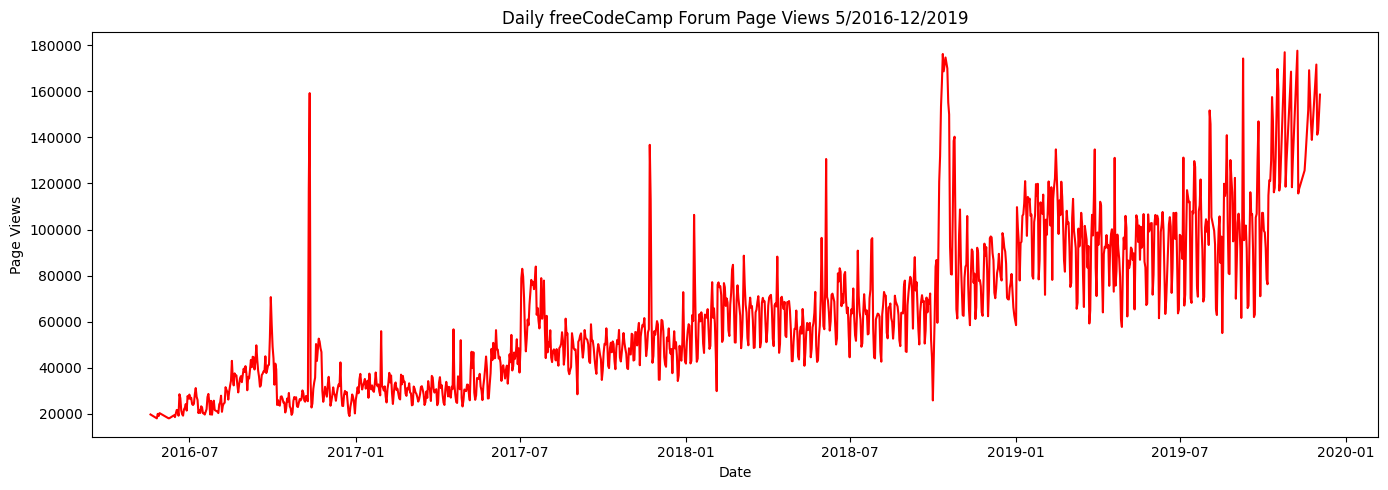

In [263]:
# def draw_line_plot():

    # fig, ax = plt.subplots()


# Draw line plot
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(df_line, color='red')
ax.set_xlabel("Date")
ax.set_ylabel("Page Views")
ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")

# Save image and return fig (don't change this part)
fig.tight_layout()
fig.savefig('line_plot.png', dpi=300) # added dpi=300 for higher resolution

In [264]:
# def draw_bar_plot():

    # It should show average daily page views for each month grouped by year.
    # The legend should show month labels and have a title of Months.
    # On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.
    
    # groupby -> mean -> unstack

# Copy and modify data for monthly bar plot
df_bar = df.copy()
df_bar['year'] = df_bar.index.year
df_bar['month'] = df_bar.index.month
df_bar['month'] = df_bar.index.month
df_bar = df_bar.groupby(['year', 'month'])['views'].mean().unstack()
df_bar.columns = [calendar.month_name[i] for i in df_bar.columns]
df_bar


,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


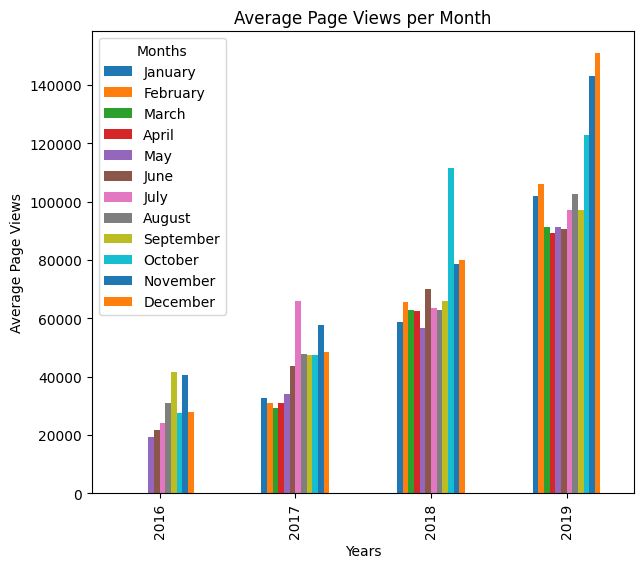

In [265]:
# Draw bar plot
fig, ax = plt.subplots(figsize=(7,6))
df_bar.plot(kind="bar", ax=ax)
ax.set_title("Average Page Views per Month")
ax.set_xlabel("Years")
ax.set_ylabel("Average Page Views")
ax.ticklabel_format(style="plain", axis='y')
ax.legend(title='Months')

In [266]:
# Save image and return fig (don't change this part)
fig.tight_layout()
fig.savefig('bar_plot.png', dpi=300)

In [267]:
# def draw_box_plot():


# Prepare data for box plots (this part is done!)
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box

,date,views,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
...,...,...,...,...
1233,2019-11-24,138875,2019,Nov
1234,2019-11-29,171584,2019,Nov
1235,2019-11-30,141161,2019,Nov
1236,2019-12-01,142918,2019,Dec


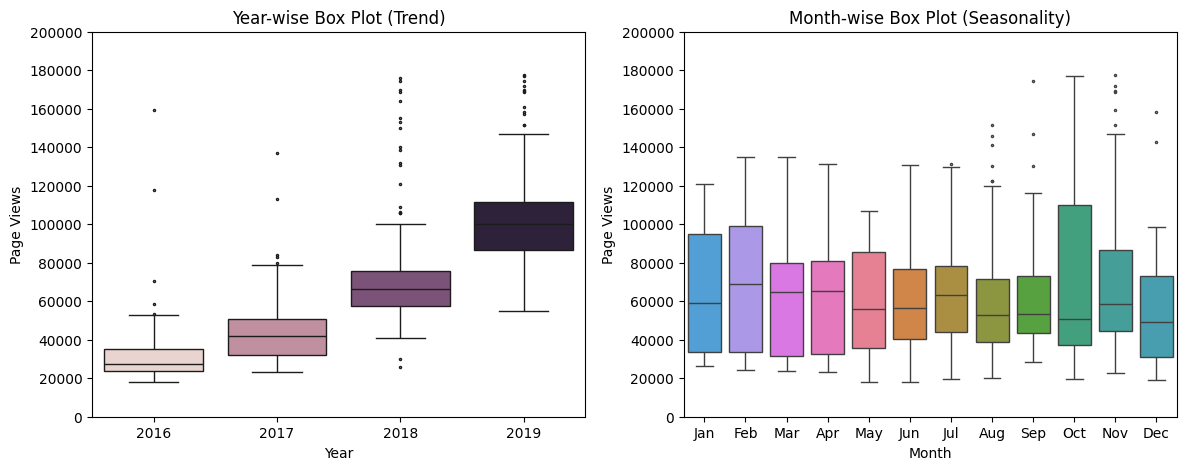

In [271]:
# Draw box plots (using Seaborn)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 5))
sns.boxplot(x='year', y='views', hue='year', data=df_box, ax=ax1, flierprops={'markersize' : 1.5})
sns.boxplot(x='month', y='views', hue='month', data=df_box, ax=ax2, flierprops={'markersize' : 1.5}, order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax1.set_title("Year-wise Box Plot (Trend)")
ax2.set_title("Month-wise Box Plot (Seasonality)")
ax1.set_xlabel("Year")
ax2.set_xlabel("Month")
ax1.set_ylabel("Page Views")
ax2.set_ylabel("Page Views")
ax1.set_yticks(np.arange(0, 200001, 20000))
ax2.set_yticks(np.arange(0, 200001, 20000))
ax1.legend_.remove()

In [269]:
# Save image and return fig (don't change this part)
fig.tight_layout()
fig.savefig('box_plot.png', dpi=300) # dpi 300 resolution